<a href="https://colab.research.google.com/github/Raavivenkatasuresh/Pattren.java/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
dataset = pd.read_csv(r'/content/Iris.csv')

In [15]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [30]:
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [17]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



In [18]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components = 2)

In [21]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [41]:
#Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder to your target variable and transform it
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [22]:
explained_variance = pca.explained_variance_ratio_

In [37]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

In [42]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [43]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [44]:
# making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [45]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap

In [46]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

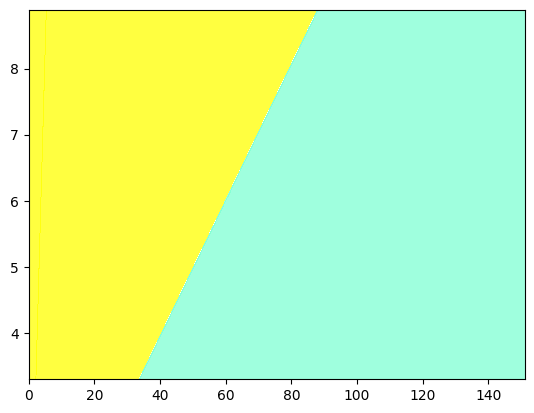

In [66]:
# Create grid from X1 and X2
grid = np.array([X1.ravel(), X2.ravel()]).T # Create the grid

# Inverse transform the grid to the original feature space
grid_original_features = pca.inverse_transform(grid) # Transform back to original features

# Now you can use grid_original_features for prediction
plt.contourf(X1, X2, classifier.predict(grid_original_features).reshape(X1.shape), alpha = 0.75,
            cmap = ListedColormap(('yellow', 'white', 'aquamarine')))


<ipython-input-67-a0478af5226d>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


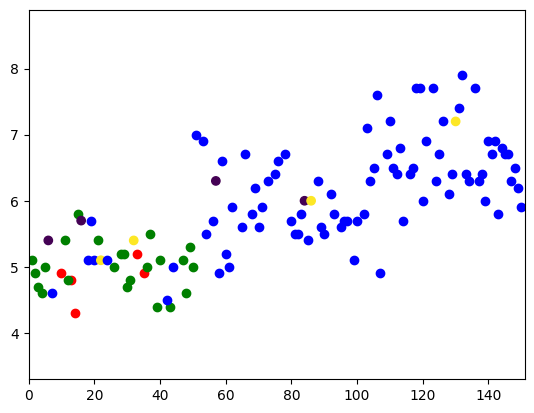

In [67]:
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)


<ipython-input-69-7ed812ecf3a4>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend() # to show legend


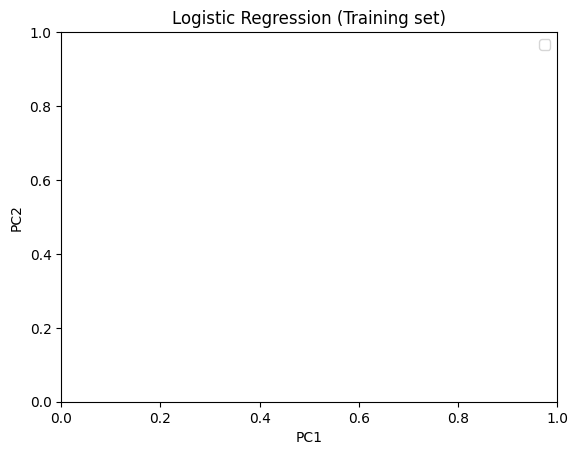

In [69]:
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

In [72]:

# show scatter plot
plt.show()

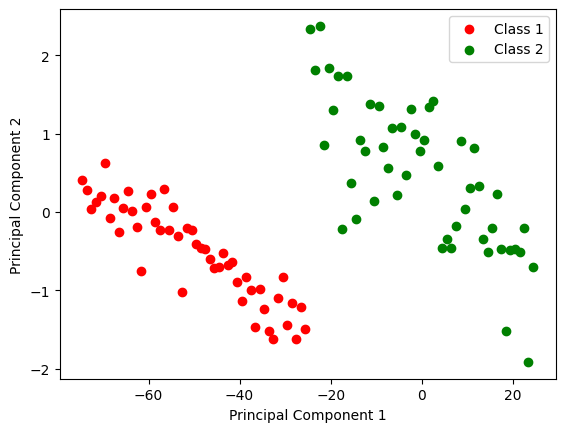

In [80]:
# plot the first two principal components with labels
X_pca = pca.fit_transform(X)
y = dataset.iloc[:, -1].values
colors = ["r", "g"]
labels = ["Class 1", "Class 2"]
for i, color, label in zip(np.unique(y), colors, labels):# plot the first two principal c
	plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
